## K Nearest Neighbour 

Lets implement and test this algorithm from scratch.

In [2]:
import sys
sys.path.append("..")

import numpy as np
from utils import euclidean_distance, accuracy_score
from utils import train_test_split, normalize, Plot

In [3]:
class KNN():
    """ K Nearest Neighbours Classifier.
    
    Parameters:
    -----------
    k: Int, Default 5
        The number of closet neigbour that will determine the class of the sample
    that we wish to predict.
    There is no hyperparameters to tune in this algorithm.
    """
    
    def __init__(self, k=5):
        self.k = k
        
    def _vote(self, neighbour_labels):
        """Return the most common class among the neighbour samples"""
        count = np.bincount(neighbour_labels.astype('int'))
        return count.argmax()
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        y_pred = np.empty(X_test.shape[0])
        
        #Determine the class of each sample
        for i, test_sample in enumerate(X_test):
            idx = np.argsort([euclidean_distance(test_sample, train_sample) for train_sample in self.X_train])[:self.k]
            
            k_nearest_neighbours = np.array([self.y_train[i] for i in idx])
            
            y_pred[i] = self._vote(k_nearest_neighbours)
        
        return y_pred
        

###  Test algorithm

[0. 2. 1. 0. 1. 2. 0. 0. 0. 1. 1. 2. 0. 1. 2. 2. 1. 0. 1. 0. 0. 2. 0. 0.
 0. 0. 2. 1. 2. 0. 2. 2. 0. 2. 2. 2. 0. 2. 2. 1. 0. 0. 1. 0.]
Accuracy:  1.0


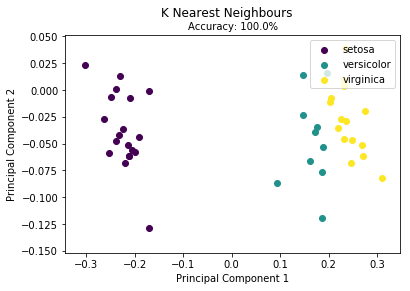

In [6]:
def main():
    from sklearn import datasets
    np.random.seed = 123
    data = datasets.load_iris()
    X = normalize(data.data)
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    
    # Fit our classifier
    clf = KNN(k=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: ", accuracy)
    
    Plot().plot_in_2d(X_test, y_pred, title = "K Nearest Neighbours",
                     accuracy = accuracy, legend_labels = data.target_names)

if __name__ == "__main__":
    main()